<a href="https://colab.research.google.com/github/RAHULRAANU/NLP/blob/main/LSTMshort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
import numpy as np
import swifter
import re
import string
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow
import nltk
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
!python3 --version

Python 3.8.10


In [4]:
# reading path 
path1 = r'/content/cybersecurity_tweets.csv'
path2 = r'/content/not_cybersecurity_tweets.csv'

In [5]:
csv1 = pd.read_csv(path1)
csv2 = pd.read_csv(path2)

df = pd.concat([csv1,csv2])

In [6]:
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
199995,Attackers Test Weak Passwords in Purple Fox Ma...,0
199996,Aviso para los usuarios de correo de @AytoMurc...,0
199997,NPM had an obfuscated birthday-like easter egg...,0
199998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


In [7]:
df = shuffle(df)
df

,text,label
9695,Save on the top five password managers of 2022...,0
54750,Trezor Customers Targeted with Phishing Scam ...,0
44676,DNS hijacking attacks on home routers https://...,0
168536,Nvidia’s Stolen Code-Signing Certs Used to Sig...,0
50529,Is your organization considering the potential...,1
...,...,...
65713,RT @AdvPrashantMali: the biggest #dataleak in ...,0
55445,The latest warning comes after similar Russian...,0
64596,#Bitcoin 🪙 v/ @saylor #crypto #cryptocurrency...,1
53421,Cybercrime gang backdoors U.S. finance organiz...,0


In [8]:
df.text

9695      Save on the top five password managers of 2022...
54750     Trezor Customers Targeted with Phishing Scam  ...
44676     DNS hijacking attacks on home routers https://...
168536    Nvidia’s Stolen Code-Signing Certs Used to Sig...
50529     Is your organization considering the potential...
                                ...                        
65713     RT @AdvPrashantMali: the biggest #dataleak in ...
55445     The latest warning comes after similar Russian...
64596     #Bitcoin 🪙 v/ @saylor  #crypto #cryptocurrency...
53421     Cybercrime gang backdoors U.S. finance organiz...
106915    Nigerian IT Professionals in Canada (NIPCA @ni...
Name: text, Length: 400000, dtype: object

In [9]:
df.drop_duplicates(inplace = True)

## Text Preprocessing

     texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods

In [10]:
class text_preprocess:
    
    def __init__(self):
        pass

    def convert_to_lower(self, text):
        return text.lower()

    def remove_emojis(self, text):
        text = re.sub(r"(?:\@|https?\://)\S+", r" ", text) #remove links and mentions
        text = re.sub(r"<.*?>", r" ", text)

        wierd_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emotions
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u'\U00010000-\U0010ffff'
            u"\u200d"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\u3030"
            u"\ufe0f"
            u"\u2069"
            u"\u2066"
            u"\u200c"
            u"\u2068"
            u"\u2067"
            "]+", flags=re.UNICODE)

        rm_emoji = wierd_pattern.sub(r' ', text)
        return rm_emoji

    def remove_html(self, text):
        html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        rm_html = re.sub(html, r' ', text)
        return rm_html

    def remove_URL(self,text):
        url = re.compile(r'https?://\S+|www\.\S+')
        URL = url.sub(r' ', text)
        return URL
    
    def remove_non_ascii(self, text):
        return re.sub(r'[^\x00-\x7f]',r' ', text) # or ''.join([x for x in text if x in string.printable]) 
    
    
    def remove_numbers(self, text):
        number_pattern = r'\d+'
        without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
        return without_number


    def remove_punctuation(self,text):
        return text.translate(str.maketrans('', '', string.punctuation)) # A/c to need give space ' ' , ' '


    def remove_extra_white_spaces(self, text):
        single_char_pattern = re.compile(r'\s+[a-zA-Z]\s+')
        without_sc = re.sub(single_char_pattern, r" ", text)
#         without_sc = text.replace(' ', '')
        return without_sc


    def preprocessText(self,text):            
        return self.remove_extra_white_spaces(self.remove_non_ascii(self.remove_URL(self.remove_html(self.remove_punctuation(self.remove_numbers(self.remove_emojis(self.convert_to_lower(text))))))))


In [11]:
if __name__ == "__main__":    
    text_prpocess_obj = text_preprocess()
    df.text = df.text.swifter.apply(lambda x: text_prpocess_obj.preprocessText(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [12]:
df.text

9695         save on the top five password managers of     
54750     trezor customers targeted with phishing scam  ...
44676     dns hijacking attacks on home routers   attack...
168536    nvidia stolen codesigning certs used to sign m...
50529     is your organization considering the potential...
                                ...                        
65713     rt   the biggest dataleak in india history in ...
55445     the latest warning comes after similar russian...
64596     bitcoin crypto cryptocurrency cryptocurrencies...
53421     cybercrime gang backdoors us finance organizat...
106915    nigerian it professionals in canada nipca   is...
Name: text, Length: 390162, dtype: object

## Tokenization of words

In [13]:
# from nltk.tokenize import sent_tokenize

# # Sentence Tokenization
# def tokenize(text):
#     my_doc = sent_tokenize(text)
#     token_list = []
#     for token in my_doc:
#         token_list.append(token)
#     return "".join(token_list) 

In [14]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Word Tokenization .
def tokenize(text):
    my_doc = nlp(text)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    return token_list    

In [15]:
df.text = df.text.swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [16]:
df.text

9695      [save, on, the, top, five, password, managers,...
54750     [trezor, customers, targeted, with, phishing, ...
44676     [dns, hijacking, attacks, on, home, routers,  ...
168536    [nvidia, stolen, codesigning, certs, used, to,...
50529     [is, your, organization, considering, the, pot...
                                ...                        
65713     [rt,   , the, biggest, dataleak, in, india, hi...
55445     [the, latest, warning, comes, after, similar, ...
64596     [bitcoin, crypto, cryptocurrency, cryptocurren...
53421     [cybercrime, gang, backdoors, us, finance, org...
106915    [nigerian, it, professionals, in, canada, nipc...
Name: text, Length: 390162, dtype: object

## Remove Stopwords

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):  
    lst=[]
    for token in text:
        if token not in stop_words:    #checking whether the word is not 
            lst.append(token)  
    return " ".join(lst)

# df.text = df.text.apply(lambda x:[word for word in x if word not in stop_words])


In [19]:
df.text = df.text.swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [20]:
df.text

9695                   save top five password managers     
54750     trezor customers targeted phishing scam       ...
44676     dns hijacking attacks home routers    attack s...
168536    nvidia stolen codesigning certs used sign malw...
50529     organization considering potential damage may ...
                                ...                        
65713     rt    biggest dataleak india history terms num...
55445     latest warning comes similar russian malware i...
64596     bitcoin crypto cryptocurrency cryptocurrencies...
53421     cybercrime gang backdoors us finance organizat...
106915    nigerian professionals canada nipca    webinar...
Name: text, Length: 390162, dtype: object

## Lemmatization

In [21]:
# For remove Whitespace in text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

lemmatizer = WordNetLemmatizer()

nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

words = set(nltk.corpus.words.words())
# words = nltk.word_tokenize(corpus)


import nltk


class lemmatization:
    
    def __init__(self):
        pass
    
    def lemmatizing_space(self, text):   
        return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

#     def lemmatizing_words(self, text):
#         return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

#     def lemmatize(self, text):
#         return self.lemmatizing_space(self.lemmatizing_words(text))


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
if __name__ == '__main__':
    lemmatization_obj = lemmatization()
    df.text = df.text.swifter.apply(lambda x: lemmatization_obj.lemmatizing_space(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [23]:
df.text

9695                         save top five password manager
54750     trezor customer targeted phishing scam diamant...
44676     dns hijacking attack home router attack securi...
168536     nvidia stolen codesigning cert used sign malware
50529     organization considering potential damage may ...
                                ...                        
65713     rt biggest dataleak india history term number ...
55445     latest warning come similar russian malware in...
64596     bitcoin crypto cryptocurrency cryptocurrencies...
53421     cybercrime gang backdoor u finance organizatio...
106915    nigerian professional canada nipca webinar one...
Name: text, Length: 390162, dtype: object

## Remove words from a string length between 2

In [24]:
def removelt2wordslength(text):    
    for x in text:
        xx = re.compile(r'\W*\b\w{1,2}\b')
        rm_word = re.sub(xx, '', text)
        return rm_word

In [25]:
df.text = df.text.swifter.apply(lambda x: removelt2wordslength(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [26]:
df.text

9695                         save top five password manager
54750     trezor customer targeted phishing scam diamant...
44676     dns hijacking attack home router attack securi...
168536     nvidia stolen codesigning cert used sign malware
50529     organization considering potential damage may ...
                                ...                        
65713      biggest dataleak india history term number us...
55445     latest warning come similar russian malware in...
64596     bitcoin crypto cryptocurrency cryptocurrencies...
53421     cybercrime gang backdoor finance organization ...
106915    nigerian professional canada nipca webinar one...
Name: text, Length: 390162, dtype: object

## LSTM(Long Short term memory)

In [27]:
df = df.dropna()
df

,text,label
9695,save top five password manager,0
54750,trezor customer targeted phishing scam diamant...,0
44676,dns hijacking attack home router attack securi...,0
168536,nvidia stolen codesigning cert used sign malware,0
50529,organization considering potential damage may ...,1
...,...,...
65713,biggest dataleak india history term number us...,0
55445,latest warning come similar russian malware in...,0
64596,bitcoin crypto cryptocurrency cryptocurrencies...,1
53421,cybercrime gang backdoor finance organization ...,0


## Train Test Split

In [28]:
TRAIN_SIZE = 0.73
MAX_SEQUENCE_LENGTH = 19

In [29]:
train_data, test_data = train_test_split(df, test_size= 1-TRAIN_SIZE,
                                         random_state=2529) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 284757
Test Data size 105322


In [30]:
# train_data.dropna()
train_data.head()

,text,label
146494,wie erkennt man phishingmails cybersicherheit via,0
64354,spike email phishing attack due coronavirus fe...,0
3668,zeroday appleavd,0
194865,new malware using csv file infect user,0
198491,russia apt actively serving wellmesswellmail m...,1


## Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called Tokenization.

In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 178411


In [32]:

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), padding='post',
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),  padding='post',
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (284757, 19)
Testing X Shape: (105322, 19)


In [33]:
y_train = np.array(train_data.label)
y_test = np.array(test_data.label)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (284757, 1)
y_test shape: (105322, 1)


## Model Training - LSTM Architecture
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly(mainly) feature in both Cyber_Security and Non_Cyber_Security texts. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use Sequence Models.

Sequence Model

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

For model architecture, we use

##  1) Embedding Layer - Generates Embedding Vector for each input sequence.

##  2) Conv1D Layer - Its using to convolve data into smaller feature vectors.

##  3) LSTM - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

## 4) Dense - Fully Connected Layers for classification

In [34]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [35]:
EMBEDDING_DIM = 512
LR = 0.01
BATCH_SIZE = 128
EPOCHS = 2

In [36]:
embedding_layer = tensorflow.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          input_length = MAX_SEQUENCE_LENGTH
                                          )

In [37]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(512, 5, activation='relu')(x)
x = Bidirectional(LSTM(512, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tensorflow.keras.Model(sequence_input, outputs)

In [38]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [39]:

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(
                                     min_lr =  0.001,
                                     monitor = 'val_loss',
                                     )

##  Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on...
May the CUDA Cores be with you. 
CUDA (or Compute Unified Device Architecture) is a parallel computing platform and
application programming interface (API) that allows software to use certain types of graphics processing units 
(GPUs) for general purpose processing, an approach called general-purpose computing on GPUs (GPGPU)


In [40]:
# print("Training on GPU...") if tensorflow.test.is_gpu_available() else print("Training on CPU...")

print("Training on GPU...") if tensorflow.config.list_physical_devices('GPU') else print("Training on CPU...")


Training on GPU...


In [41]:
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/2
2225/2225 [==============================] - 449s 196ms/step - loss: 0.1266 - accuracy: 0.9561 - val_loss: 0.0785 - val_accuracy: 0.9778 - lr: 0.0100
Epoch 2/2
2225/2225 [==============================] - 441s 198ms/step - loss: 0.0728 - accuracy: 0.9787 - val_loss: 0.0714 - val_accuracy: 0.9790 - lr: 0.0100


##Model Evaluation
plot accuracy and loss

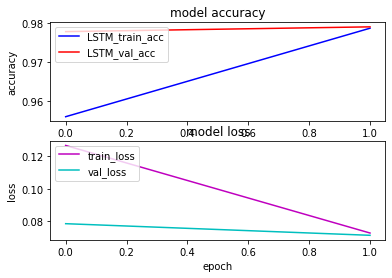

In [42]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train_acc', 'LSTM_val_acc'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train_loss', 'val_loss'], loc = 'upper left')

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score,f1_score, recall_score

In [44]:
y_pred = model.predict(x_test)

3292/3292 [==============================] - 42s 12ms/step


In [45]:
y_pred[0]

array([0.99848974], dtype=float32)

In [46]:
test_accuracy = accuracy_score(y_test, y_pred.round())
test_accuracy

0.9790357190330605

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred.round())
conf_matrix

array([[52317,   403],
       [ 1805, 50797]])

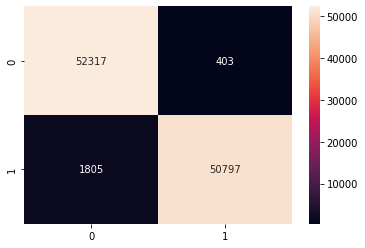

In [48]:
#heatmap of confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred.round()), annot=True, fmt = '1d')

In [49]:
#classification report
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     52720
           1       0.99      0.97      0.98     52602

    accuracy                           0.98    105322
   macro avg       0.98      0.98      0.98    105322
weighted avg       0.98      0.98      0.98    105322



## Testing 
the model will output a prediction score between 0 and 1 , we can classify two classes by defining a threshold value for it. in our case i have set 0.5 as threshold value , if the score above it, Then it will classified as Cybersecurity text

In [50]:
def decode_text(score):
  return "cybersecurity_text" if score > 0.5 else "Not_cyber_security"

scores = model.predict(x_test)
print(len(scores))  

3292/3292 [==============================] - 42s 13ms/step
105322


In [51]:
scores.mean() #for threshold

0.49297303

In [52]:
scores.max(), scores.min()

(1.0, 0.00045204)

In [53]:
y_pred_text = [decode_text(score) for score in scores]

In [54]:
text = ['threat:someone with the potential Hello! Botnet🚀👾🚀, Are you ready? Wanna gain M. 🙃 U+1F643 UPSIDE-DOWN FACE  to cause harm by damaging or destroying the official data of a system or organization']

In [55]:
df = pd.DataFrame(text, columns=['text1'])

In [56]:
df

,text1
0,threat:someone with the potential Hello! Botne...


In [57]:
# Text Preprocessing
df.text1 = df.text1.swifter.apply(lambda x: text_prpocess_obj.preprocessText(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
# Tokenization of words
df.text1 = df.text1.swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
# Remove Stopwords
df.text1 = df.text1.swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
# Lemmatization
df.text1 = df.text1.swifter.apply(lambda x: lemmatization_obj.lemmatizing_space(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
# remove words from a string length between 2
df.text1 = df.text1.swifter.apply(lambda x: removelt2wordslength(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
df.text1.tolist()

['threatsomeone potential hello botnet ready wanna gain upsidedown face cause harm damaging destroying official data system organization']

In [63]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [64]:
# TOKENIZATION
tokk = Tokenizer()
tokk.fit_on_texts(df.text1.values)
seq = tokk.texts_to_sequences(df.text1.values)
seqmatrix = pad_sequences(seq, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH )

In [65]:
test = model.predict(seqmatrix)

1/1 [==============================] - 0s 81ms/step


In [66]:
test

array([[0.99999976]], dtype=float32)

In [67]:
Y_pred_othertext = [decode_text(score) for score in test]

In [68]:
Y_pred_othertext

['cybersecurity_text']

In [69]:
# model.save('lstm.h5')